In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/shots/shot log ATL.csv')

In [3]:
df.head()

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,SF,Yes,97.0,SCORED,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,2016-10-27,Kent Bazemore,NaN,1,MISSED
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,2016-10-27,Dwight Howard,2.0,1,SCORED
2,SCORED,SG,Yes,239.0,MISSED,ATL,Jump Shot,2,WAS,223.0,1:41,2016-10-27,Kyle Korver,30.0,1,SCORED
3,SCORED,PG,Yes,102.0,SCORED,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,2016-10-27,Dennis Schroder,35.0,1,SCORED
4,SCORED,PF,Yes,128.0,MISSED,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,2016-10-27,Paul Millsap,24.0,1,MISSED


In [4]:
df = df.drop(['self previous shot', 'opponent previous shot', 'time from last shot'], axis = 1)
df = df.rename(columns={'player position':'player_position','shot type':'shot_type','away team': 'away_team','current shot outcome':'outcome', 'home team' : 'home_team', 'location x':'loc_x','location y':'loc_y','shoot player':'shooter','home game':'home'})

In [5]:
df = df[df.date == '2016-10-27']

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    backboard2 = Rectangle((895, 225), 1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((60, 250), radius=6, linewidth=lw, color=color, fill=False)
    hoop2 = Circle((885, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    restricted2 = Arc((895, 250), 80, 80, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow2_outer = Arc((755, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow2_inner = Arc((755, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color, linestyle='dashed')
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    threepoint2 = Arc((850, 250), 450, 400, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)    
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    innerbox2 = Rectangle((920, 200), -175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                          fill=False)
    
    outbox2 = Rectangle((930, 190), -175, 120, linewidth=lw, color=color,
                          fill=False)
    
    half_court_line = Rectangle((470, 0), 1, 500, linewidth=lw, color=color,
                          fill=False)
    
    half_court_circle  = Circle((470, 250), radius=60, linewidth=lw, color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, backboard2, hoop1, hoop2, restricted1,
                      restricted2, threepoint1, threepoint2, innerbox1,
                      innerbox2, freethrow1_outer, freethrow2_outer,
                      outbox1, outbox2, freethrow1_inner, freethrow2_inner,
                      half_court_line, half_court_circle]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 910, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=False, labelleft=False)
    
    return ax

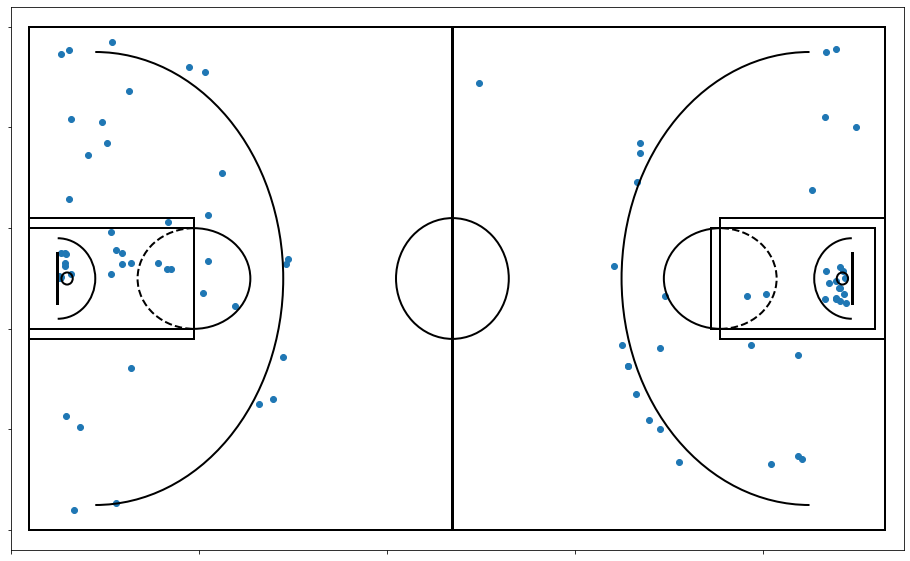

In [7]:
plt.figure(figsize=(16,10))
draw_court(outer_lines=True)
plt.xlim(0,950)
plt.ylim(-20,520)
plt.scatter(df['loc_x'],df['loc_y'])
plt.show()

In [8]:
def draw_half_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((55, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow1_point = Circle((195, 250), radius=4, linewidth=lw, color=color, fill=True)
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                      fill=False)
    
    half_court_circle  = Arc((490, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    half_court_point  = Arc((490, 250), 5, 5, angle=270, theta1=180, theta2=0, linewidth=6,
                 color=color)
    
    lower_three_line = Rectangle((20, 25), 70, 1, linewidth=0.5*lw, color=color,
                          fill=False)
    
    upper_three_line = Rectangle((20, 475), 70, 1, linewidth=0.5*lw, color=color,
                      fill=False)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, hoop1, restricted1,
                       threepoint1, innerbox1, freethrow1_outer,freethrow1_point,
                      outbox1, freethrow1_inner,lower_three_line, upper_three_line, half_court_circle, half_court_point]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 470, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=False, labelleft=False)
    
    return ax

In [9]:
df1 = df[df.quarter == 1]
df2 = df[df.quarter == 2]
df3 = df[df.quarter == 3]
df4 = df[df.quarter == 4]

In [10]:
middle_x = 470.0
middle_y = 250.0

In [11]:
len(df4)

21

In [12]:
df3.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome
49,PG,Yes,886.0,ATL,Driving Layup,2,WAS,257.0,0:15,2016-10-27,Dennis Schroder,3,SCORED
50,SF,Yes,868.0,ATL,Jump Shot,3,WAS,475.0,1:02,2016-10-27,Kent Bazemore,3,MISSED
51,PF,Yes,871.0,ATL,Driving Layup,2,WAS,246.0,1:26,2016-10-27,Paul Millsap,3,SCORED
52,PF,Yes,642.0,ATL,Jump Shot,3,WAS,262.0,2:33,2016-10-27,Paul Millsap,3,MISSED
53,PF,Yes,868.0,ATL,Driving Layup,2,WAS,257.0,3:31,2016-10-27,Paul Millsap,3,SCORED


In [40]:
df3.at[49,'loc_y']>=250

True

In [13]:
df3['loc_x_mirror'] = df3['loc_x'] - 2*(df3['loc_x']-middle_x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df3.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome
49,PG,Yes,886.0,ATL,Driving Layup,2,WAS,257.0,0:15,2016-10-27,Dennis Schroder,3,SCORED
50,SF,Yes,868.0,ATL,Jump Shot,3,WAS,475.0,1:02,2016-10-27,Kent Bazemore,3,MISSED
51,PF,Yes,871.0,ATL,Driving Layup,2,WAS,246.0,1:26,2016-10-27,Paul Millsap,3,SCORED
52,PF,Yes,642.0,ATL,Jump Shot,3,WAS,262.0,2:33,2016-10-27,Paul Millsap,3,MISSED
53,PF,Yes,868.0,ATL,Driving Layup,2,WAS,257.0,3:31,2016-10-27,Paul Millsap,3,SCORED


In [25]:
df3['loc_x_mirror'] = df3['loc_x'] - 2 * np.abs((df3['loc_x'] - middle_x))

In [26]:
df3.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome,loc_x_mirror
49,PG,Yes,886.0,ATL,Driving Layup,2,WAS,257.0,0:15,2016-10-27,Dennis Schroder,3,SCORED,54.0
50,SF,Yes,868.0,ATL,Jump Shot,3,WAS,475.0,1:02,2016-10-27,Kent Bazemore,3,MISSED,72.0
51,PF,Yes,871.0,ATL,Driving Layup,2,WAS,246.0,1:26,2016-10-27,Paul Millsap,3,SCORED,69.0
52,PF,Yes,642.0,ATL,Jump Shot,3,WAS,262.0,2:33,2016-10-27,Paul Millsap,3,MISSED,298.0
53,PF,Yes,868.0,ATL,Driving Layup,2,WAS,257.0,3:31,2016-10-27,Paul Millsap,3,SCORED,72.0


In [31]:
df3['loc_y_mirror'] = np.where(df3['loc_y']<=250,df3['loc_y'] + 2 * np.abs((df3['loc_y'] - middle_y)),df3['loc_y'] - 2 * np.abs((df3['loc_y'] - middle_y)))

In [32]:
df3.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome,loc_x_mirror,loc_y_mirror
49,PG,Yes,886.0,ATL,Driving Layup,2,WAS,257.0,0:15,2016-10-27,Dennis Schroder,3,SCORED,54.0,243.0
50,SF,Yes,868.0,ATL,Jump Shot,3,WAS,475.0,1:02,2016-10-27,Kent Bazemore,3,MISSED,72.0,25.0
51,PF,Yes,871.0,ATL,Driving Layup,2,WAS,246.0,1:26,2016-10-27,Paul Millsap,3,SCORED,69.0,254.0
52,PF,Yes,642.0,ATL,Jump Shot,3,WAS,262.0,2:33,2016-10-27,Paul Millsap,3,MISSED,298.0,238.0
53,PF,Yes,868.0,ATL,Driving Layup,2,WAS,257.0,3:31,2016-10-27,Paul Millsap,3,SCORED,72.0,243.0


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 49 to 66
Data columns (total 15 columns):
player_position    18 non-null object
home               18 non-null object
loc_x              18 non-null float64
home_team          18 non-null object
shot_type          18 non-null object
points             18 non-null int64
away_team          18 non-null object
loc_y              18 non-null float64
time               18 non-null object
date               18 non-null object
shooter            18 non-null object
quarter            18 non-null int64
outcome            18 non-null object
loc_x_mirror       18 non-null float64
loc_y_mirror       18 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.2+ KB


In [44]:
def mirror(df):
    if df['quarter'] == 3:
        df['loc_x'] = df['loc_x'] - 2 * np.abs((df['loc_x'] - middle_x))
        df['loc_y'] = np.where(df['loc_y']<=250,df['loc_y'] + 2 * np.abs((df['loc_y'] - middle_y)),df['loc_y'] - 2 * np.abs((df['loc_y'] - middle_y)))
    elif df['quarter'] == 4:
        df['loc_x'] = df['loc_x'] - 2 * np.abs((df['loc_x'] - middle_x))
        df['loc_y'] = np.where(df['loc_y']<=250,df['loc_y'] + 2 * np.abs((df['loc_y'] - middle_y)),df['loc_y'] - 2 * np.abs((df['loc_y'] - middle_y)))

    return df

In [46]:
mirror_quarter = [3,4]

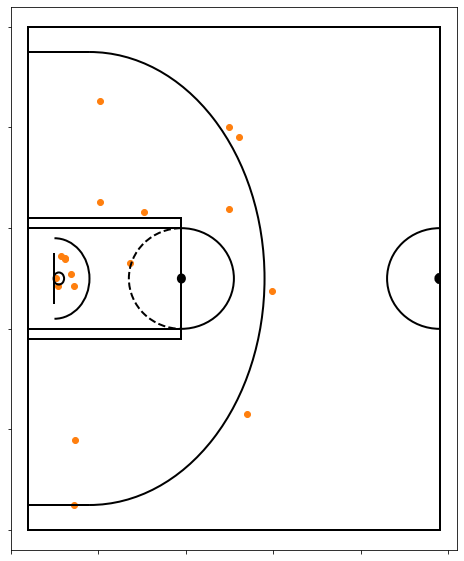

In [33]:
plt.figure(figsize=(8,10))
draw_half_court(outer_lines=True)
plt.scatter(df3['loc_x'],df3['loc_y'])
plt.xlim(0,510)
plt.ylim(-20,520)
plt.scatter(df3['loc_x_mirror'],df3['loc_y_mirror'])
plt.show()